In [284]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [285]:
df = pd.read_csv('loan_data_2007_2014.txt')

/tmp/ipykernel_380993/4033074154.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.txt')


In [286]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
df.shape

(466285, 75)

In [288]:
df.drop_duplicates(inplace=True)

In [289]:
df.shape

(466285, 75)

In [290]:
df.duplicated(subset=['id']).sum()

0

In [291]:
df['issue_d'].nunique()

91

In [292]:
df1 = pd.read_csv('loan_data_2015.txt')

/tmp/ipykernel_380993/1443982568.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('loan_data_2015.txt')


In [293]:
df1.iloc[:,19]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
421089    NaN
421090    NaN
421091    NaN
421092    NaN
421093    NaN
Name: desc, Length: 421094, dtype: object

In [294]:
df1.iloc[:,55]

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4         Not Verified
              ...     
421089             NaN
421090             NaN
421091             NaN
421092             NaN
421093             NaN
Name: verification_status_joint, Length: 421094, dtype: object

In [295]:
df1.shape

(421094, 74)

In [296]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [297]:
df1['issue_d'].unique()

array(['Dec-15', 'Nov-15', 'Oct-15', 'Sep-15', 'Aug-15', 'Jul-15',
       'Jun-15', 'May-15', 'Apr-15', 'Mar-15', 'Feb-15', 'Jan-15'],
      dtype=object)

In [298]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [299]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [300]:
df.shape

(466285, 74)

In [301]:
df1.shape

(421094, 74)

In [302]:
df = pd.concat([df, df1], axis=0, ignore_index=True)

In [303]:
inv_cols = [col for col in df.columns if col.endswith('_inv')]

df.drop(columns=inv_cols, inplace=True)

In [304]:
df.drop(['id', 'member_id', 'url', 'policy_code', 'application_type', 'zip_code', 'emp_title', 'title'], axis=1, inplace=True)

In [305]:
df.shape

(887379, 63)

In [306]:
pd.set_option('display.max_rows', None)

In [307]:
df['issue_d'].value_counts()

issue_d
Oct-15    48631
Jul-15    45962
Dec-15    44342
Oct-14    38782
Nov-15    37530
Aug-15    35886
Apr-15    35427
Jan-15    35107
May-15    31913
Jul-14    29306
Sep-15    28641
Jun-15    28485
Mar-15    25400
Nov-14    25054
Feb-15    23770
May-14    19099
Apr-14    19071
Aug-14    18814
Jun-14    17179
Mar-14    16513
Jan-14    15628
Feb-14    15269
Dec-13    15020
Nov-13    14676
Oct-13    14114
Sep-13    12987
Aug-13    12674
Jul-13    11910
Jun-13    10899
Sep-14    10606
May-13    10350
Dec-14    10307
Apr-13     9419
Mar-13     8273
Feb-13     7561
Jan-13     6872
Nov-12     6382
Oct-12     6263
Sep-12     6087
Dec-12     6066
Aug-12     5419
Jul-12     4627
Jun-12     3817
May-12     3400
Apr-12     3230
Mar-12     2914
Jan-12     2602
Feb-12     2560
Dec-11     2267
Nov-11     2232
Oct-11     2118
Sep-11     2067
Aug-11     1934
Jul-11     1875
Jun-11     1835
May-11     1704
Apr-11     1563
Mar-11     1448
Jan-11     1380
Dec-10     1335
Feb-11     1298
Oct-10     1232


In [308]:
pd.set_option('display.max_rows', 20)

In [309]:
# 1. Chuyển đổi cột 'issue_d' sang datetime
# %b: Tên tháng viết tắt (Jan, Feb...)
df['issue_d_dt'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df.drop(['issue_d'], axis=1, inplace=True)

# Sắp xếp lại dữ liệu theo thời gian 
df = df.sort_values('issue_d_dt')

# 2. THIẾT LẬP CÁC MỐC THỜI GIAN
# Mốc 1: Kết thúc tập Train/Val (Hết tháng 9/2014)
train_cutoff = pd.Timestamp('2014-09-30')

# Mốc 2: Bắt đầu tập OOT (Đầu năm 2015)
oot_start = pd.Timestamp('2015-01-01')

# 3. CHIA TÁCH DỮ LIỆU
# Tập Development (2007 -> 09/2014)
df_dev = df[df['issue_d_dt'] <= train_cutoff].copy()

# Tập OOT (2015 -> Hết)
df_oot = df[df['issue_d_dt'] >= oot_start].copy()

# Lưu ý: Các dòng thuộc tháng 10, 11, 12 năm 2014 tự động bị loại bỏ (Gap)

# 4. CHIA TẬP DEV THÀNH TRAIN (80%) VÀ VALIDATION (20%)
# Sử dụng train_test_split để chia ngẫu nhiên
# shuffle=True: Trộn ngẫu nhiên để đảm bảo phân phối đều
df_train, df_val = train_test_split(df_dev, test_size=0.2, random_state=42, shuffle=True)

# 5. KIỂM TRA KẾT QUẢ
print(f"--- THỐNG KÊ SỐ LƯỢNG ---")
print(f"1. Tổng số dữ liệu gốc: {len(df):,}")
print(f"2. Tập Train (80% Dev): {len(df_train):,} (Từ 2007 đến 09/2014)")
print(f"3. Tập Val   (20% Dev): {len(df_val):,} (Từ 2007 đến 09/2014)")
print(f"4. Tập OOT   (2015):    {len(df_oot):,} (Năm 2015)")
print(f"5. Dữ liệu Gap (Bỏ):    {len(df) - len(df_train) - len(df_val) - len(df_oot):,} (Tháng 10-12/2014)")

# Kiểm tra phân phối thời gian để chắc chắn không bị nhầm
print("\n--- KIỂM TRA THỜI GIAN MAX/MIN ---")
print(f"Train Max Date: {df_train['issue_d_dt'].max().strftime('%Y-%m')}")
print(f"OOT Min Date:   {df_oot['issue_d_dt'].min().strftime('%Y-%m')}")

--- THỐNG KÊ SỐ LƯỢNG ---
1. Tổng số dữ liệu gốc: 887,379
2. Tập Train (80% Dev): 313,713 (Từ 2007 đến 09/2014)
3. Tập Val   (20% Dev): 78,429 (Từ 2007 đến 09/2014)
4. Tập OOT   (2015):    421,094 (Năm 2015)
5. Dữ liệu Gap (Bỏ):    74,143 (Tháng 10-12/2014)

--- KIỂM TRA THỜI GIAN MAX/MIN ---
Train Max Date: 2014-09
OOT Min Date:   2015-01


In [310]:
pd.set_option('display.max_rows', None)

### Tính đầy đủ 

In [311]:
# 1. Tính toán số lượng và tỷ lệ Null
null_sum = df.isnull().sum()
null_pct = (df.isnull().mean()) * 100  # mean() tương đương sum()/count()

# 2. Tạo bảng kết quả
missing_data = pd.DataFrame({
    'Total Null': null_sum,
    'Percent (%)': null_pct
})

# 3. Sort giảm dần (Biến nhiều Null nhất lên đầu)
missing_data = missing_data.sort_values(by='Percent (%)', ascending=False)

# 4. Hiển thị kết quả
# Chỉ hiển thị các cột có Null > 0 cho gọn (nếu muốn xem hết thì bỏ dòng lọc này đi)
print("--- CÁC BIẾN CÓ DỮ LIỆU BỊ THIẾU ---")
display(missing_data[missing_data['Total Null'] > 0])

# Nếu muốn xem top 20 biến thiếu nhiều nhất:
# display(missing_data.head(20))

--- CÁC BIẾN CÓ DỮ LIỆU BỊ THIẾU ---


,Total Null,Percent (%)
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
open_acc_6m,866007,97.591559
max_bal_bc,866007,97.591559
inq_last_12m,866007,97.591559
inq_fi,866007,97.591559
all_util,866007,97.591559


In [312]:
pd.set_option('display.max_rows', 20)

In [313]:
df.shape

(887379, 63)

Loại bỏ các biến joint applcation có 99% null. Đây là các thông tin về thu nhập/xác thực khi có 2 người cùng đứng tên vay. Trong khi hầu hết hồ sơ vay trên Lending Club là cá nhân (Individual), nên không có người thứ 2

In [314]:
df.drop(['dti_joint', 'verification_status_joint', 'annual_inc_joint'], axis=1, inplace=True)

Xóa các biến mô tả của người vay 

In [315]:
df.shape

(887379, 60)

In [316]:
df.drop(['desc'], axis=1, inplace=True)

Xóa các biến ngày trả khoản vay tiếp theo. Các biến này null do nếu khoản vay đã đóng (Paid off hoặc Charged Off), sẽ không còn ngày trả tiếp theo. Loại bỏ để tránh data leakage. 

In [317]:
df.shape

(887379, 59)

In [318]:
df.drop(['next_pymnt_d', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], axis=1, inplace=True)

Các biến này thuộc về nhóm "New Attributes" mà Lending Club mới bắt đầu thu thập vào khoảng cuối năm 2012 hoặc 2013. Do dataset bắt đầu từ 2007, nên toàn bộ giai đoạn 2007-2012 sẽ không có dữ liệu này

In [319]:
df.shape

(887379, 54)

In [320]:
group_3_cols = [
    'il_util',              # Tỷ lệ sử dụng hạn mức vay trả góp
    'mths_since_rcnt_il',   # Số tháng kể từ lần vay trả góp gần nhất
    'inq_last_12m',         # Số lần tra soát tín dụng trong 12 tháng
    'total_cu_tl',          # Số lượng tài khoản tài chính (Credit Union)
    'inq_fi',               # Số lần tra soát tài chính cá nhân
    'all_util',             # Tỷ lệ sử dụng hạn mức của tất cả các loại tài khoản
    'max_bal_bc',           # Số dư lớn nhất trên thẻ tín dụng (Bankcard)
    'open_rv_24m',          # Số tài khoản quay vòng (thẻ) mở trong 24 tháng
    'total_bal_il',         # Tổng số dư nợ vay trả góp
    'open_il_24m',          # Số khoản vay trả góp mở trong 24 tháng
    'open_il_12m',          # Số khoản vay trả góp mở trong 12 tháng
    'open_il_6m',           # Số khoản vay trả góp mở trong 6 tháng
    'open_acc_6m',          # Số tài khoản bất kỳ mở trong 6 tháng
    'open_rv_12m'           # Số tài khoản quay vòng mở trong 12 tháng
]

# Lệnh xóa
df = df.drop(columns=group_3_cols, errors='ignore')

In [321]:
df.shape

(887379, 40)

In [322]:
# 1. Tính toán số lượng và tỷ lệ Null
null_sum = df.isnull().sum()
null_pct = (df.isnull().mean()) * 100  # mean() tương đương sum()/count()

# 2. Tạo bảng kết quả
missing_data = pd.DataFrame({
    'Total Null': null_sum,
    'Percent (%)': null_pct
})

# 3. Sort giảm dần (Biến nhiều Null nhất lên đầu)
missing_data = missing_data.sort_values(by='Percent (%)', ascending=False)

# 4. Hiển thị kết quả
# Chỉ hiển thị các cột có Null > 0 cho gọn (nếu muốn xem hết thì bỏ dòng lọc này đi)
print("--- CÁC BIẾN CÓ DỮ LIỆU BỊ THIẾU ---")
display(missing_data[missing_data['Total Null'] > 0])

# Nếu muốn xem top 20 biến thiếu nhiều nhất:
# display(missing_data.head(20))

--- CÁC BIẾN CÓ DỮ LIỆU BỊ THIẾU ---


,Total Null,Percent (%)
mths_since_last_record,750326,84.555303
mths_since_last_major_derog,665676,75.015974
mths_since_last_delinq,454312,51.197065
tot_coll_amt,70276,7.919502
total_rev_hi_lim,70276,7.919502
tot_cur_bal,70276,7.919502
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
collections_12_mths_ex_med,145,0.016340


Các biến có tỉ lệ obs null lớn nhưng vẫn được giữ lại: 
- mths_since_last_delinq: Số tháng kể từ lần trễ hạn gần nhất
- mths_since_last_record: Số tháng kể từ khi có hồ sơ công khai (phá sản, kiện tụng...)
- mths_since_last_major_derog: Số tháng kể từ lần nợ xấu nghiêm trọng gần nhất

Nếu obs mang giá trị là Null có nghĩa là khách hàng chưa từng bị trễ hạn, chưa từng phá sản. Các obs này sẽ được impute bằng giá trị 9999.

In [323]:
cols_to_impute = [
    'mths_since_last_delinq', 
    'mths_since_last_record', 
    'mths_since_last_major_derog'
]

df[cols_to_impute] = df[cols_to_impute].fillna(9999)

In [324]:
df.shape

(887379, 40)

In [325]:
# 1. Tính toán số lượng và tỷ lệ Null
null_sum = df.isnull().sum()
null_pct = (df.isnull().mean()) * 100  # mean() tương đương sum()/count()

# 2. Tạo bảng kết quả
missing_data = pd.DataFrame({
    'Total Null': null_sum,
    'Percent (%)': null_pct
})

# 3. Sort giảm dần (Biến nhiều Null nhất lên đầu)
missing_data = missing_data.sort_values(by='Percent (%)', ascending=False)

# 4. Hiển thị kết quả
# Chỉ hiển thị các cột có Null > 0 cho gọn (nếu muốn xem hết thì bỏ dòng lọc này đi)
print("--- CÁC BIẾN CÓ DỮ LIỆU BỊ THIẾU ---")
display(missing_data[missing_data['Total Null'] > 0])

# Nếu muốn xem top 20 biến thiếu nhiều nhất:
# display(missing_data.head(20))

--- CÁC BIẾN CÓ DỮ LIỆU BỊ THIẾU ---


,Total Null,Percent (%)
tot_cur_bal,70276,7.919502
total_rev_hi_lim,70276,7.919502
tot_coll_amt,70276,7.919502
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
collections_12_mths_ex_med,145,0.016340
last_credit_pull_d,53,0.005973
total_acc,29,0.003268
inq_last_6mths,29,0.003268


In [326]:
df.shape

(887379, 40)

- Bỏ biến do tỉ lệ missing lớn: 19
- Giữ lại và impute: 3

Tổng còn lại: 50

### Kiểm tra logic từng biến 

In [327]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'issue_d_dt'],
      dtype='object')

In [328]:
pd.set_option('display.max_columns', None)

In [329]:
df.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_dt
count,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887379.000000,887379.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.000000,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05,887379
mean,14755.264605,14741.877625,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,5135.818624,8465.514220,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,7558.826684,1754.804327,2164.145585,0.014380,7511.866405,0.004991,2.257026e+02,1.394582e+05,3.206862e+04,2014-07-10 06:50:58.855347968
min,500.000000,500.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2007-06-01 00:00:00
25%,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,32.000000,9999.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,1914.590000,441.460000,280.170000,0.000000,9999.000000,0.000000,0.000000e+00,2.985300e+04,1.390000e+04,2013-12-01 00:00:00
50%,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,9999.000000,9999.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,4894.999117,1073.280000,462.780000,0.000000,9999.000000,0.000000,0.000000e+00,8.055900e+04,2.370000e+04,2014-11-01 00:00:00
75%,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,9999.000000,9999.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,13659.055000,10616.814230,2238.265000,831.245000,0.000000,9999.000000,0.000000,0.000000e+00,2.082050e+05,3.980000e+04,2015-07-01 00:00:00
max,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,9999.000000,9999.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,57777.579870,24205.620000,36475.590000,20.000000,9999.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,2015-12-01 00:00:00
std,8435.455601,8429.897657,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,4981.066227,3588.085502,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,7871.243336,2095.356099,4794.783233,0.134191,4309.694248,0.077625,1.031137e+04,1.537500e+05,3.749826e+04,NaN


In [330]:
pd.set_option('display.max_columns', 20)

dti: Debt-to-Income Ratio max = 999 

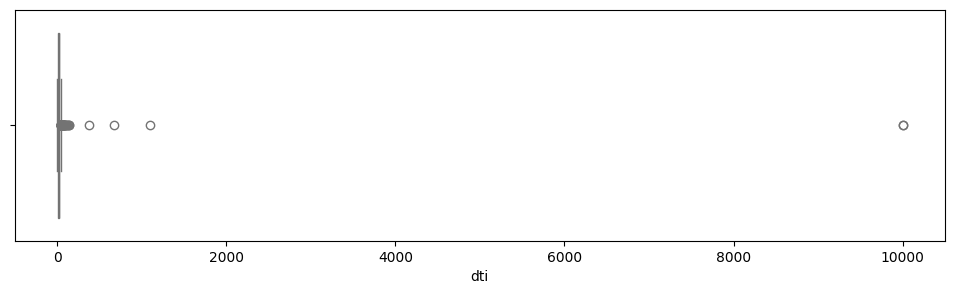

In [331]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['dti'], color='lightgreen')

plt.xlabel('dti')

# Hiển thị hình
plt.show()

annual_inc min = 0

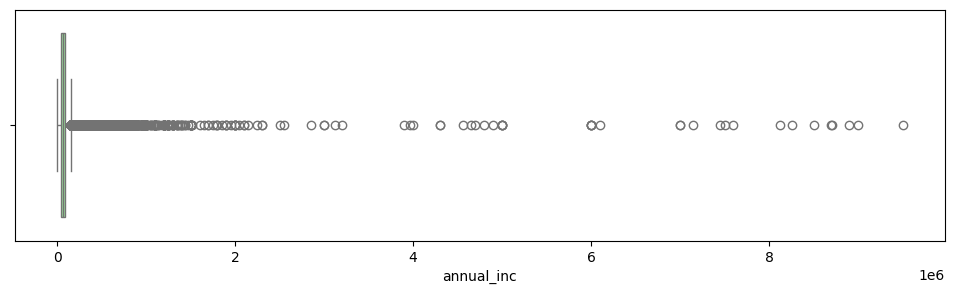

In [332]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['annual_inc'], color='lightgreen')

plt.xlabel('annual_inc')

# Hiển thị hình
plt.show()

In [333]:
a = df[df['annual_inc'] == 0]
a['dti']

531886    9999.0
484446    9999.0
Name: dti, dtype: float64

In [334]:
a = df[df['dti'] == 9999]
a['annual_inc']

531886    0.0
484446    0.0
Name: annual_inc, dtype: float64

In [335]:
df.drop(a.index, inplace=True)

In [336]:
df['dti'] = df['dti'].clip(upper=60)

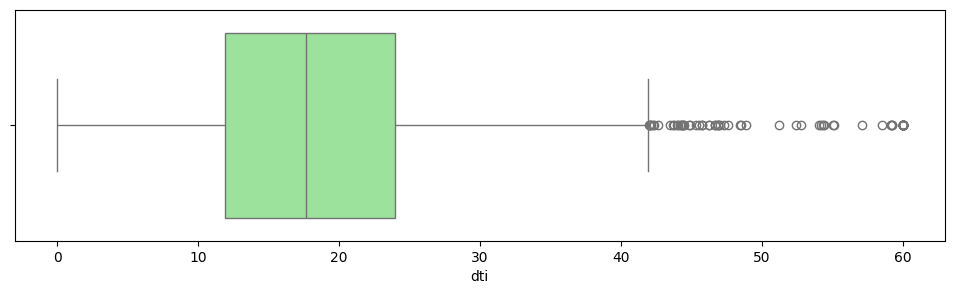

In [337]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['dti'], color='lightgreen')

plt.xlabel('dti')

# Hiển thị hình
plt.show()

revol_util max = 892.3

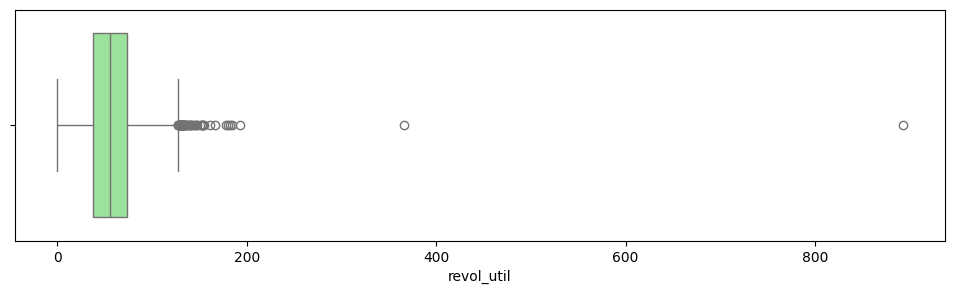

In [338]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['revol_util'], color='lightgreen')
a
plt.xlabel('revol_util')

# Hiển thị hình
plt.show()

In [339]:
df['revol_util'] = df['revol_util'].clip(upper=120)

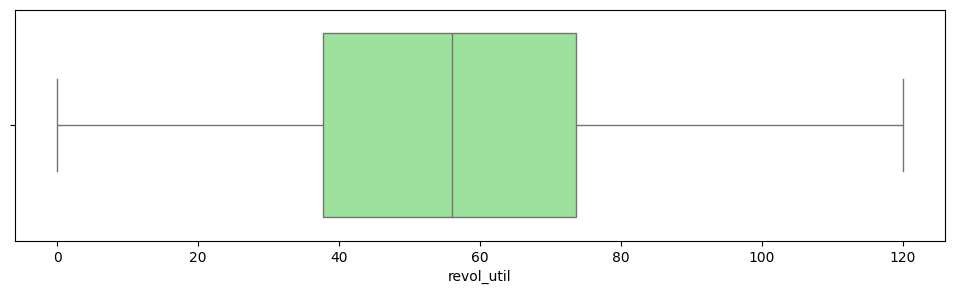

In [340]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['revol_util'], color='lightgreen')
a
plt.xlabel('revol_util')

# Hiển thị hình
plt.show()

### outlier

annual_inc

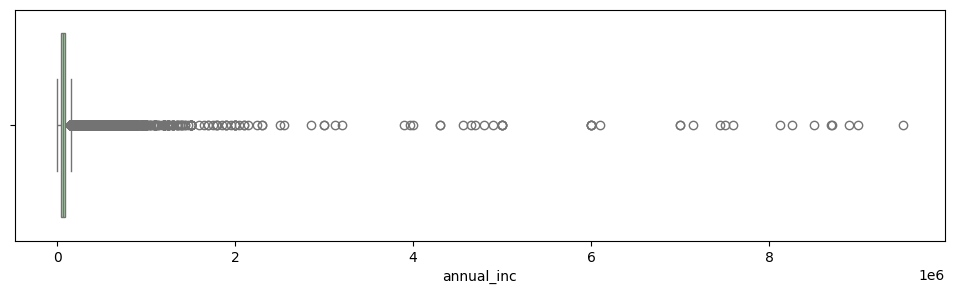

In [341]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['annual_inc'], color='lightgreen')

plt.xlabel('annual_inc')

# Hiển thị hình
plt.show()

tot_coll_amt

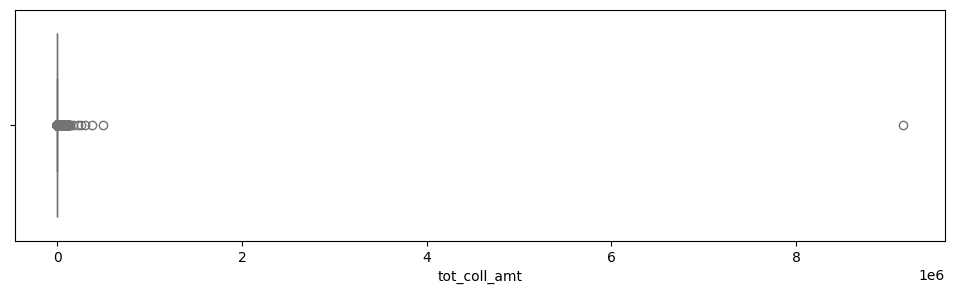

In [342]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['tot_coll_amt'], color='lightgreen')

plt.xlabel('tot_coll_amt')

# Hiển thị hình
plt.show()

total_rev_hi_lim

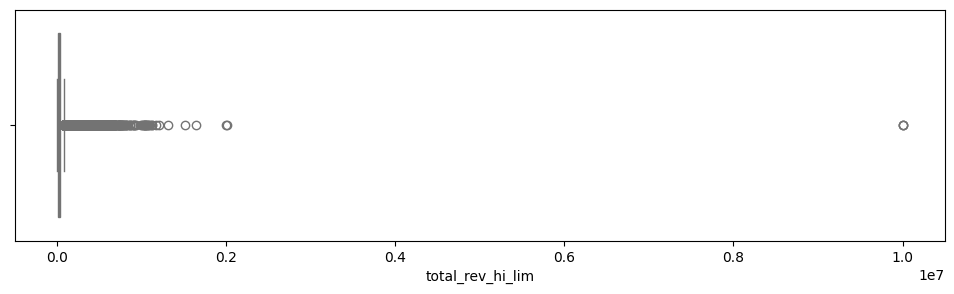

In [343]:
plt.figure(figsize=(12, 3))
    
sns.boxplot(x=df['total_rev_hi_lim'], color='lightgreen')

plt.xlabel('total_rev_hi_lim')

# Hiển thị hình
plt.show()

### các cột mang thông tin giống nhau 

loan_amnt

In [344]:
df['grade']    

39785     E
42512     C
42513     B
42514     B
42515     C
         ..
495430    A
495429    D
495428    C
495436    C
501391    E
Name: grade, Length: 887377, dtype: object

In [345]:
df['sub_grade']

39785     E2
42512     C2
42513     B4
42514     B2
42515     C4
          ..
495430    A2
495429    D2
495428    C1
495436    C4
501391    E4
Name: sub_grade, Length: 887377, dtype: object

In [346]:
sub_grade_prefix = df['sub_grade'].astype(str).str[0]

# 2. So sánh với cột grade
# Tạo điều kiện: True nếu giống nhau, False nếu khác nhau
is_match = (sub_grade_prefix == df['grade'])

# 3. Thống kê kết quả
num_matches = is_match.sum()
num_mismatches = len(df) - num_matches

print(f"Tổng số dòng dữ liệu: {len(df)}")
print(f"Số dòng KHỚP (Match): {num_matches}")
print(f"Số dòng LỆCH (Mismatch): {num_mismatches}")

Tổng số dòng dữ liệu: 887377
Số dòng KHỚP (Match): 887377
Số dòng LỆCH (Mismatch): 0


In [347]:
df.drop('grade', axis=1, inplace=True)